In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
project_path = '/content/drive/My Drive/deep learning/Residency 7/Assignments and Projects/Computervison_project_1_plant_seedlings_classification/'

In [0]:
import cv2
import numpy as np
from glob import glob
import os
from matplotlib import pyplot as plt

In [0]:
train_path = project_path + 'train.zip'
test_path = project_path + 'test.zip'

In [0]:
#extracting training path and test path
from zipfile import ZipFile
with ZipFile(train_path, 'r') as f:
  f.extractall()
with ZipFile(test_path, 'r') as f1:
  f1.extractall()
  

In [0]:

x_train = []
y_train = []


os.chdir(project_path)

In [0]:
os.listdir()

['sample_submission.csv',
 'test.zip',
 'train.zip',
 'train',
 'test',
 'Residency7_Computer_Vision_Project1.ipynb']

In [0]:
os.chdir(project_path+'train/')

In [0]:
import cv2

In [11]:
for i in os.listdir():
  print(i)
  for j in os.listdir(i):
    temp = cv2.imread(project_path+'train/'+i+'/'+j)
    temp = cv2.resize(temp,(128,128))
    x_train.append(temp)
    y_train.append(i)

Fat Hen
Small-flowered Cranesbill
Cleavers
Black-grass
Sugar beet
Shepherds Purse
Charlock
Loose Silky-bent
Scentless Mayweed
Maize
Common Chickweed
Common wheat


In [0]:
x_test = []

os.chdir(project_path+'test/')

In [0]:
for i in os.listdir():
  temp = cv2.imread(i)
  temp = cv2.resize(temp,(128,128))
  x_test.append(temp)
 

Fetching images per class and displaying them

In [0]:
images_per_class = {}
for class_folder_name in os.listdir(project_path+'train/'):
    class_folder_path = os.path.join(project_path+'train/', class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images_per_class[class_label].append(image_bgr)

Converting training data to numpy array


In [15]:
import numpy as np
x_train_arr = np.array(x_train)
y_train_arr = np.array(y_train)
print(x_train_arr.shape)
print(y_train_arr.shape)

(4750, 128, 128, 3)
(4750,)


In [16]:
x_test_arr = np.array(x_test)
print(x_test_arr.shape)

(794, 128, 128, 3)


Clean the training data

(4750, 128, 128, 3)


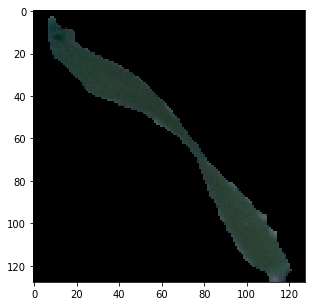

In [17]:
train_clean = []
for img in x_train_arr:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)
    #print(mask[2])
  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    #Apply the mask
    
    output = cv2.bitwise_and(img, img, mask = mask)
    train_clean.append(output)# Append image without background
    
train_clean = np.asarray(train_clean)

print(train_clean.shape)

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.imshow(output)
       
        

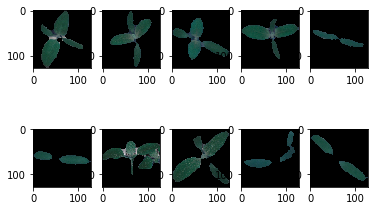

In [18]:
import matplotlib.pyplot as plt
for i in range(0,10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_clean[i])

Clean the test data

In [19]:
test_clean = []
for img in x_test_arr:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    bMask = mask > 0  
    
    #Apply the mask #bitwise and takes the image and retains the masked area alone and blacks out the background.
    output = cv2.bitwise_and(img, img, mask = mask)
    test_clean.append(output)
    
test_clean = np.asarray(test_clean)
print(test_clean.shape)

(794, 128, 128, 3)


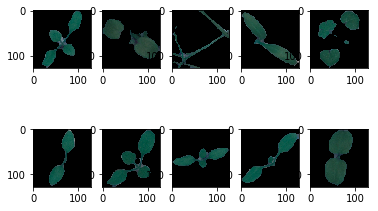

In [20]:
import matplotlib.pyplot as plt
for i in range(0,10):
  plt.subplot(2,5,i+1)
  plt.imshow(test_clean[i])

Encode train and test labels

In [21]:
#currently the labels are in the form of text, so we label encode them to numbers

y_train_arr

array(['Fat Hen', 'Fat Hen', 'Fat Hen', ..., 'Common wheat',
       'Common wheat', 'Common wheat'], dtype='<U25')

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_arr = le.fit_transform(y_train_arr)

In [0]:
import keras
y_train_dum = keras.utils.to_categorical(y_train_arr, num_classes=12)

Building CNN Model

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, Reshape, BatchNormalization
from keras import backend as K

In [0]:
#Normalizing
train_clean = train_clean.astype('float32')
test_clean = test_clean.astype('float32')
train_clean /= 255
test_clean /= 255

In [0]:
#Split the training folder images itself into train and test. P.S the test folder images are not touched here.
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(train_clean, y_train_dum, 
                                                test_size=0.1, random_state=1, 
                                                stratify = y_train_dum)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(trainX)

In [28]:
trainX.shape

(4275, 128, 128, 3)

In [29]:
# Define Model
    from keras.optimizers import adam
    model = Sequential()
    #model.add(BatchNormalization(input_shape = (128,128,3)))
    model.add(Convolution2D(64, (3,3), activation ='relu', padding = 'same',input_shape = (128, 128, 3))) 
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    #model.add(BatchNormalization())
    model.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    #model.add(BatchNormalization())
    model.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    #model.add(BatchNormalization())
    model.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Flatten()) 

# fully connected layer
    #model.add(Dense(units=128,activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    #model.add(Dropout(0.3))
    #model.add(Dense(units = 32, activation = 'relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(units = 12, activation = 'softmax')) 

    # Loss and Optimizer
    #opti = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    #model.fit(trainX, trainY, batch_size=64, nb_epoch=20, 
    #          validation_data=(testX, testY))
    model.fit_generator(datagen.flow(trainX, trainY, batch_size=32), nb_epoch=20, validation_data=(testX, testY), steps_per_epoch=1000,callbacks = callback_list)
  

W0727 17:22:41.089869 140127450822528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 17:22:41.157670 140127450822528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 17:22:41.180279 140127450822528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0727 17:22:41.222106 140127450822528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0727 17:22:41.227587 140127450822528 deprecation_wrapp

Epoch 1/20
1000/1000 [==============================] - 116s 116ms/step - loss: 1.0860 - acc: 0.6310 - val_loss: 0.5862 - val_acc: 0.7916
Epoch 2/20
1000/1000 [==============================] - 109s 109ms/step - loss: 0.5911 - acc: 0.8005 - val_loss: 0.4269 - val_acc: 0.8421
Epoch 3/20
1000/1000 [==============================] - 110s 110ms/step - loss: 0.4490 - acc: 0.8408 - val_loss: 0.3663 - val_acc: 0.8589
Epoch 4/20
1000/1000 [==============================] - 112s 112ms/step - loss: 0.3636 - acc: 0.8666 - val_loss: 0.2924 - val_acc: 0.8611
Epoch 5/20
1000/1000 [==============================] - 113s 113ms/step - loss: 0.3046 - acc: 0.8857 - val_loss: 0.2604 - val_acc: 0.9011
Epoch 6/20
1000/1000 [==============================] - 114s 114ms/step - loss: 0.2801 - acc: 0.8962 - val_loss: 0.2443 - val_acc: 0.9116
Epoch 7/20
1000/1000 [==============================] - 111s 111ms/step - loss: 0.2471 - acc: 0.9078 - val_loss: 0.2560 - val_acc: 0.9032
Epoch 8/20
1000/1000 [============

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
__________

In [0]:
#Prediction of the classes for test images.
y_pred = model.predict_classes(test_clean)

In [0]:
y_pred_transform = le.inverse_transform(y_pred)

In [39]:
y_pred_transform

array(['Common Chickweed', 'Cleavers', 'Loose Silky-bent', 'Sugar beet',
       'Small-flowered Cranesbill', 'Common Chickweed',
       'Common Chickweed', 'Common Chickweed', 'Common Chickweed',
       'Cleavers', 'Black-grass', 'Loose Silky-bent', 'Cleavers',
       'Loose Silky-bent', 'Loose Silky-bent', 'Fat Hen', 'Sugar beet',
       'Cleavers', 'Cleavers', 'Black-grass', 'Sugar beet',
       'Scentless Mayweed', 'Fat Hen', 'Loose Silky-bent',
       'Scentless Mayweed', 'Shepherds Purse', 'Loose Silky-bent',
       'Loose Silky-bent', 'Common Chickweed', 'Sugar beet',
       'Scentless Mayweed', 'Fat Hen', 'Black-grass', 'Loose Silky-bent',
       'Common Chickweed', 'Black-grass', 'Common Chickweed',
       'Black-grass', 'Loose Silky-bent', 'Sugar beet', 'Maize',
       'Common Chickweed', 'Cleavers', 'Black-grass', 'Scentless Mayweed',
       'Black-grass', 'Sugar beet', 'Loose Silky-bent',
       'Common Chickweed', 'Fat Hen', 'Small-flowered Cranesbill',
       'Black-grass'

In [0]:
import pandas as pd
submission = pd.DataFrame(columns = ['file', 'species'])
file_list = []
os.chdir(project_path+'test/')
for i in os.listdir():
  file_list.append(i)
submission['file'] = file_list
submission['species'] = y_pred_transform

In [42]:
submission.head(5)


,file,species
0,c0461776c.png,Common Chickweed
1,4bbfd1e05.png,Cleavers
2,1d0cbd819.png,Loose Silky-bent
3,93079d970.png,Sugar beet
4,856f2910a.png,Small-flowered Cranesbill


In [0]:
os.chdir(project_path)
submission.to_csv('Score.csv', index = False)

Kaggle Submission score : 0.89168